In [1]:
# importing the required dependencies

import pandas as pd # python's library for data manipulation and preprocessing
import numpy as np  # python's library for number crunching

import matplotlib            # python's library for visualisation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


import seaborn as sns        # also python's library for visualisations
color = sns.color_palette()
sns.set_style('darkgrid')


import sklearn                #python's machine learning library
from sklearn.model_selection import train_test_split

In [2]:
housing = pd.read_csv('housing.csv')   # reading the data into a pandas dataframe
housing.head()                         # calling the first five rows of the dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()  # exploratory analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


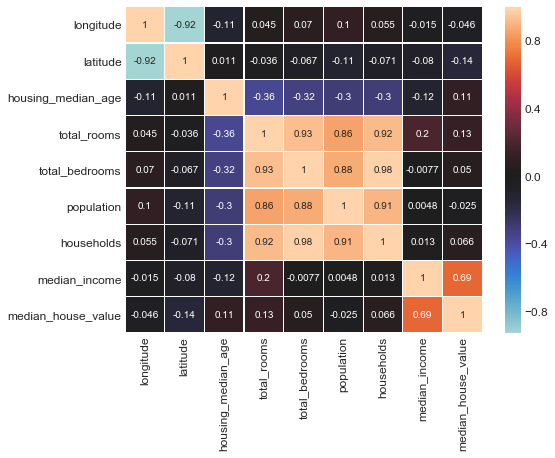

In [4]:
correlation_matrix = housing.corr()   #creating a heatmap of the attributes in the dataset
plt.subplots(figsize=(8,6))
sns.heatmap(correlation_matrix, center=0, annot=True, linewidths=.3)

In [5]:
corr = housing.corr()      # showing correlations by target variable
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

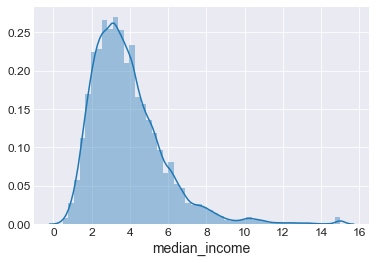

In [6]:
sns.distplot(housing.median_income) # showing the distribution of the median_income variable in the dataset
plt.show()                                  # check the distplot params though. see how you can make it prettier

In [7]:
# Divide by 1.5 to limit the number of income categories
housing["median_income_category"] = np.ceil(housing["median_income"] / 1.5)

# showing the frequency of each category
housing.median_income_category.value_counts().sort_index()

1.0      822
2.0     6581
3.0     7236
4.0     3639
5.0     1423
6.0      532
7.0      189
8.0      105
9.0       50
10.0      14
11.0      49
Name: median_income_category, dtype: int64

In [8]:
# Label those above 5 as 5
housing["median_income_category"].where(housing["median_income_category"] < 5, 5.0, inplace=True)


housing.median_income_category.value_counts().sort_index()

1.0     822
2.0    6581
3.0    7236
4.0    3639
5.0    2362
Name: median_income_category, dtype: int64

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["median_income_category"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_category
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5.0
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4.0
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3.0
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3.0
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3.0


In [10]:
def income_cat_props(data):
    return data['median_income_category'].value_counts() / len(data)


train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_props(housing),
    "Stratified": income_cat_props(strat_test_set),
    "Random": income_cat_props(test_set),
}).sort_index()


compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Random,Stratified,Rand. %error,Strat. %error
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309
2.0,0.318847,0.324370,0.318798,1.732260,-0.015195
3.0,0.350581,0.358527,0.350533,2.266446,-0.013820
4.0,0.176308,0.167393,0.176357,-5.056334,0.027480
5.0,0.114438,0.109496,0.114583,-4.318374,0.127011
